<a href="https://colab.research.google.com/github/LakshyaMalhotra/time-series-analysis/blob/main/python_funcs_time_series_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# plot formatting
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['lines.linewidth'] = 2
sns.set_palette('Dark2')
colors = list(sns.color_palette('Set1'))

In [3]:
# get the bitcoin price data from an open API
coindesk_url = 'https://api.coindesk.com/v1/bpi/historical/close.json?'

start = datetime.date(2017, 1, 1)
end = datetime.date(2020, 12, 30)

url = f'{coindesk_url}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'

result = requests.get(url)
result.content

b'{"bpi":{"2017-01-01":997.6888,"2017-01-02":1018.05,"2017-01-03":1030.8175,"2017-01-04":1129.87,"2017-01-05":1005.815,"2017-01-06":895.67,"2017-01-07":905.17,"2017-01-08":913.5238,"2017-01-09":899.35,"2017-01-10":904.7925,"2017-01-11":775.9813,"2017-01-12":802.8288,"2017-01-13":826.1213,"2017-01-14":818.6388,"2017-01-15":822.4225,"2017-01-16":830.2638,"2017-01-17":904.4538,"2017-01-18":884.2513,"2017-01-19":898.0213,"2017-01-20":891.6238,"2017-01-21":920.0113,"2017-01-22":925.3313,"2017-01-23":912.6875,"2017-01-24":885.6475,"2017-01-25":894.11,"2017-01-26":915.1,"2017-01-27":918.5625,"2017-01-28":920.28,"2017-01-29":914.0438,"2017-01-30":920.2413,"2017-01-31":967.6675,"2017-02-01":987.3463,"2017-02-02":1007.795,"2017-02-03":1018.1113,"2017-02-04":1033.6525,"2017-02-05":1013.9938,"2017-02-06":1024.6125,"2017-02-07":1052.5388,"2017-02-08":1054.3438,"2017-02-09":988.9475,"2017-02-10":993.0788,"2017-02-11":1010.0025,"2017-02-12":999.5125,"2017-02-13":996.8575,"2017-02-14":1009.2513,"2017-

In [4]:
# read the API output in a pandas dataframe
data = pd.read_json(result.content).iloc[:-2,:1]
data.index.name = 'date'
data.index = pd.to_datetime(data.index)
data

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
...,...
2020-12-26,26445.9500
2020-12-27,26248.2767
2020-12-28,27041.8667


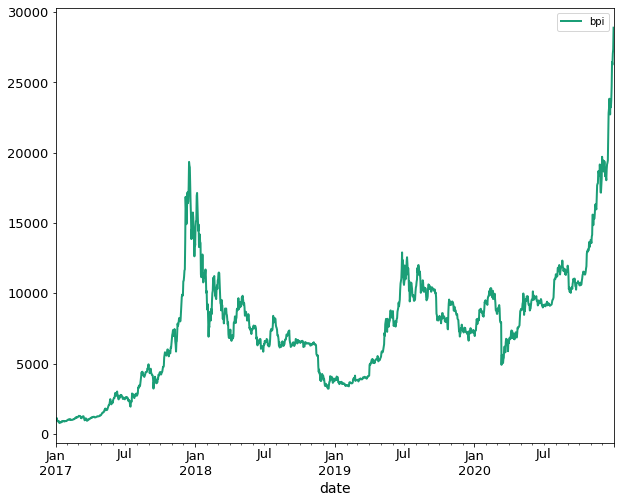

In [5]:
# quick look at the time series
data.plot();

Our data is on daily basis, we can try to aggregate it according to a time interval using `resample` method in pandas.

In [6]:
# resampling by the quarter
data.resample('Q').mean()

,bpi
date,
2017-03-31,1034.169242
2017-06-30,1919.658520
2017-09-30,3506.611449
2017-12-31,9413.347972
2018-03-31,10468.423818
2018-06-30,7747.165877
2018-09-30,6798.307918
2018-12-31,5169.904503
2019-03-31,3781.639959


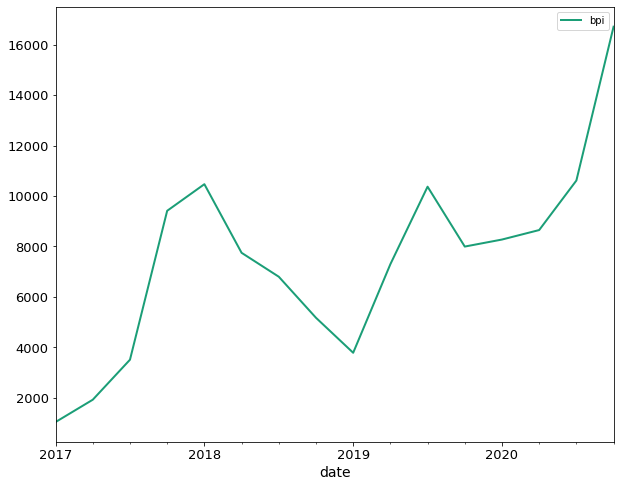

In [7]:
data.resample('Q').mean().plot();

In [8]:
monthly_resampled = data.resample('M').mean()
monthly_resampled

,bpi
date,
2017-01-31,911.259258
2017-02-28,1064.382100
2017-03-31,1129.790194
2017-04-30,1218.319247
2017-05-31,1884.280513
2017-06-30,2657.555067
2017-07-31,2533.259458
2017-08-31,3914.709377
2017-09-30,4090.707313


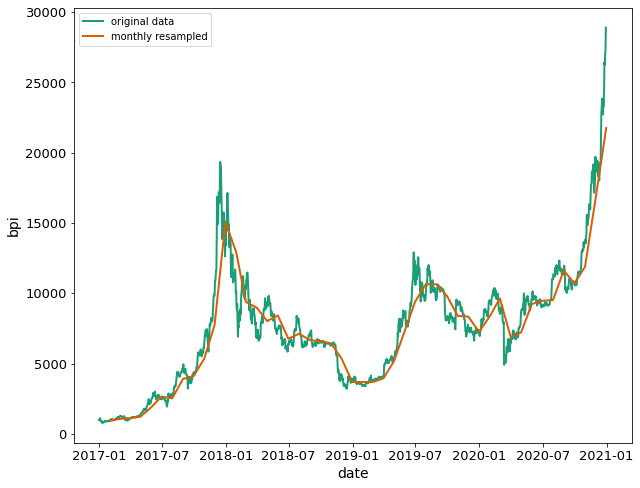

In [9]:
# plotting the resampled data with original one
plt.plot(data.index, data.bpi, label='original data')
plt.plot(monthly_resampled.index, monthly_resampled.bpi, label='monthly resampled')
plt.xlabel('date')
plt.ylabel('bpi')
plt.legend()
plt.show()

In [10]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [11]:
# shows the difference `y(t+1) - y(t)`
data[:5].diff()

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


In [12]:
# difference of current and two time steps back `y(t+2) - y(t)`
data[:5].diff(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,33.1287
2017-01-04,111.8200
2017-01-05,-25.0025


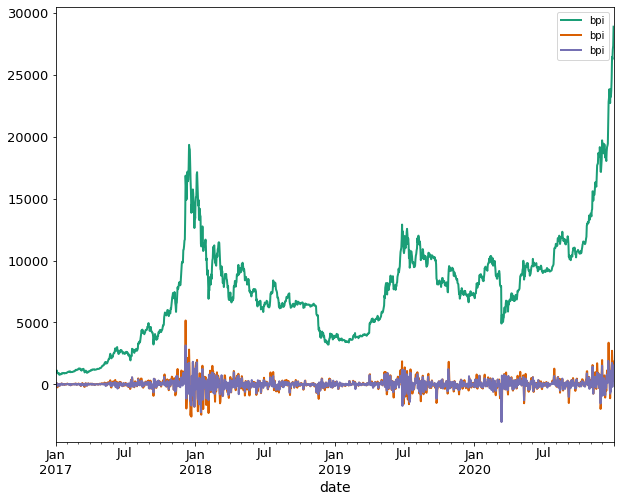

In [13]:
pd.concat([data['bpi'], data['bpi'].diff(2), data['bpi'].diff()], axis=1).plot();

We can see from plain inspection that the original data is non-stationary. However, the `diff()` and `diff(2)` methods revealed that the dfferences is stationary about 0 on which we can use techniques like ARIMA.

In [14]:
data[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [15]:
# push the data forward by one index
data[:5].shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,997.6888
2017-01-03,1018.0500
2017-01-04,1030.8175
2017-01-05,1129.8700


In [16]:
# keep data intact but move index up;
# can also be done using shift, see next cell
data[:5].tshift(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  """Entry point for launching an IPython kernel.


,bpi
date,
2017-01-03,997.6888
2017-01-04,1018.0500
2017-01-05,1030.8175
2017-01-06,1129.8700
2017-01-07,1005.8150


In [20]:
data[:5].shift(periods=2, freq='infer')

,bpi
date,
2017-01-03,997.6888
2017-01-04,1018.0500
2017-01-05,1030.8175
2017-01-06,1129.8700
2017-01-07,1005.8150


In [21]:
# `diff()` can be implemented as follows
data[:5] - data[:5].shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


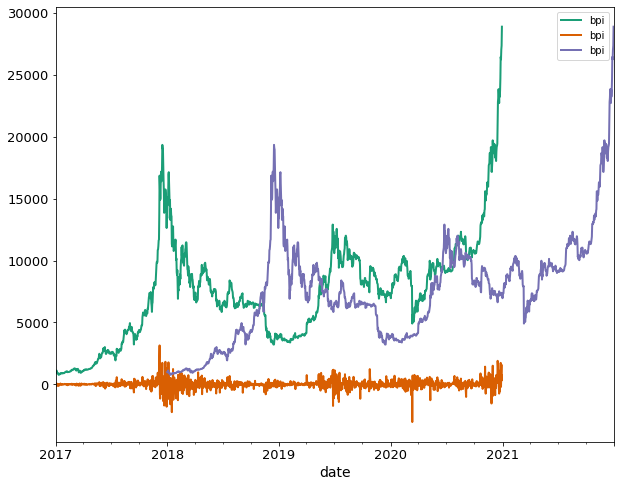

In [23]:
pd.concat([data, data-data.shift(), data.shift(periods=365, freq='infer')], axis=1).plot();

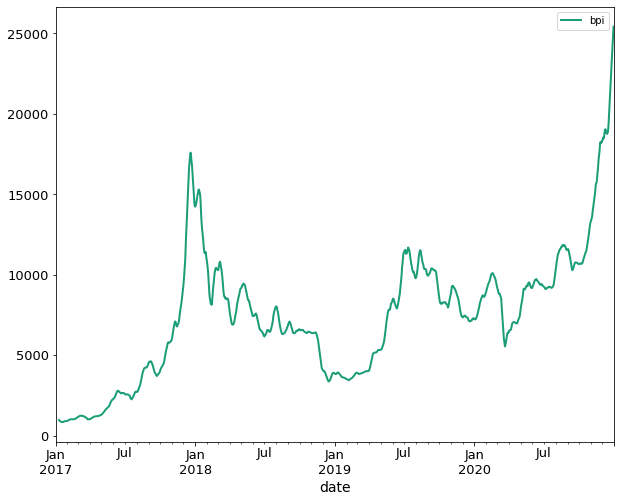

In [24]:
# rolling window (moving averages)
data.rolling(window=10).mean().plot();

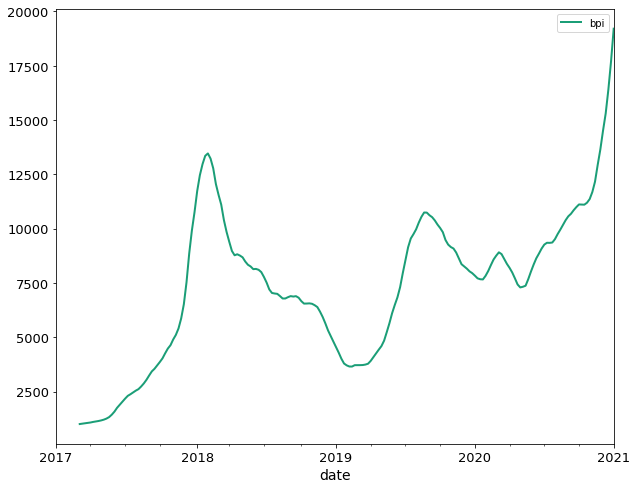

In [30]:
data.resample('W').mean().rolling(window=10).mean().plot();

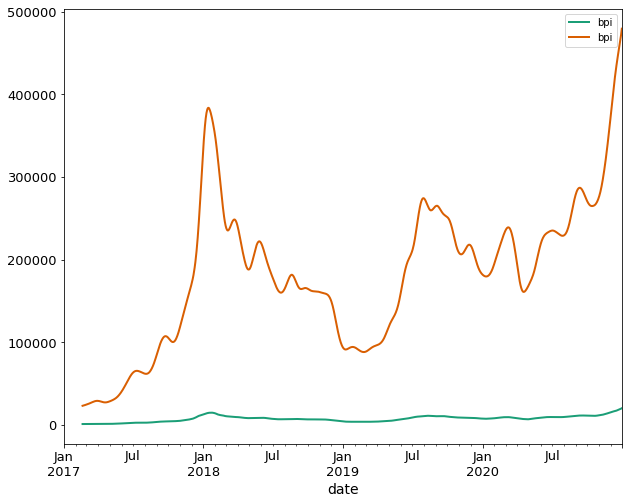

In [32]:
simple_ma = data.rolling(window=50).mean()
window_ma = data.rolling(window=50, win_type='gaussian').sum(std=10)
pd.concat([simple_ma, window_ma], axis=1).plot();

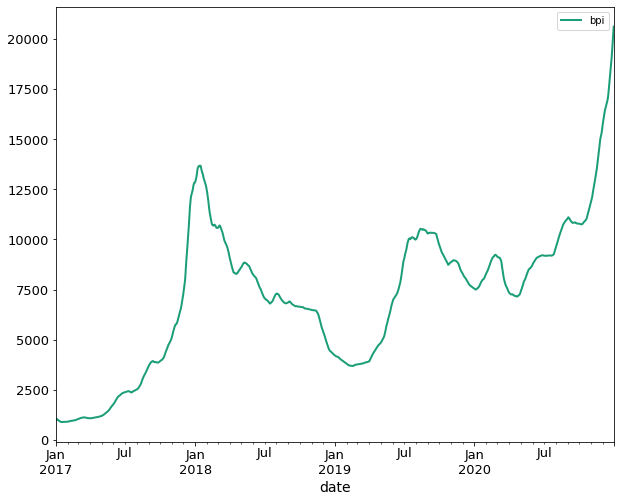

In [33]:
data.ewm(span=50).mean().plot();

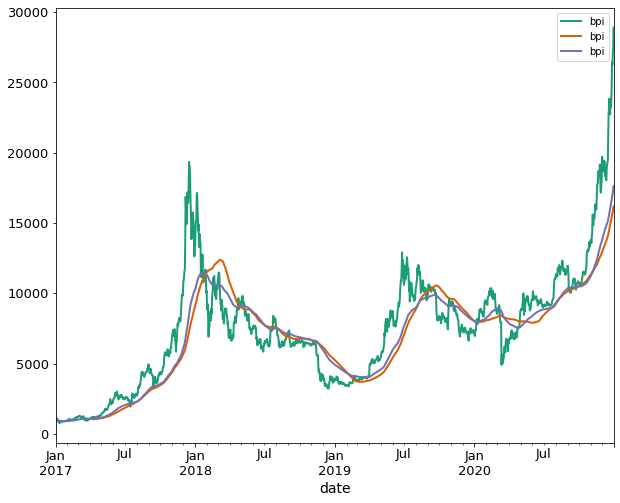

In [34]:
pd.concat([data, data.rolling(window=100).mean(), data.ewm(span=100).mean()], axis=1).plot();